# Downloading and Extracting Data

In [ ]:
import gdown
import zipfile
import os

In [ ]:
# File ID from your Google Drive link
file_id = "1sTfUoNPid9zG_MgV--lWZTBP1XZpmcK8"
output = "IQON3000"  # Specify the name to save the file as

In [ ]:
# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

In [ ]:
# Specify the path to the zip file
zip_file_path = '/content/IQON3000'
extract_to = '/content/IQON3000_EXTRA'

In [ ]:
# Create a folder to extract the zip file
os.makedirs(extract_to, exist_ok=True)

In [ ]:
# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("File extracted successfully!")

# Building DataFrames and CSVs

In [ ]:
import json
import pandas as pd
from glob import glob

In [ ]:
# Root directory of your dataset
root_dir = '/content/IQON3000_EXTRA/IQON3000/'

In [ ]:
# Get list of all user directories
user_dirs = [os.path.join(root_dir, user_dir) for user_dir in os.listdir(root_dir)]

In [ ]:
for user_dir in user_dirs:
    user_id = os.path.basename(user_dir)
    users_list.append({'user_id': user_id})

    # Get list of all set directories for this user
    set_dirs = [os.path.join(user_dir, set_dir) for set_dir in os.listdir(user_dir)]

In [ ]:
    for set_dir in set_dirs:
        set_id = os.path.basename(set_dir)
        json_file = os.path.join(set_dir, f'{set_id}.json')

        if os.path.exists(json_file):
            with open(json_file, 'r', encoding='utf-8') as f:
                data = json.load(f)

            # Extract set-level data
            set_info = {
                'set_id': data.get('setId'),
                'set_url': data.get('setUrl'),
                'like_count': int(data.get('likeCount', 0)),
                'user_id': data.get('user')
            }
            sets_list.append(set_info)

            # Process items in the set
            items = data.get('items', [])

            for item in items:
                item_id = item.get('itemId')

                # Add item to items_list if not already added
                if item_id not in [item['item_id'] for item in items_list]:
                    # Extract item-level data
                    item_info = {
                        'item_id': item_id,
                        'item_name': item.get('itemName'),
                        'item_url': item.get('itemUrl'),
                        'image_url': item.get('imgUrl'),
                        'price': item.get('price'),
                        'category_x_color': item.get('category x color'),
                        'brands': item.get('brands'),
                        'categories': item.get('categorys'),
                        'options': item.get('options'),
                        'colors': item.get('colors'),
                        'expressions': item.get('expressions')
                    }
                    items_list.append(item_info)

                # Record interaction (user viewed/added item in set)
                interaction = {
                    'user_id': user_id,
                    'item_id': item_id,
                    'set_id': set_id
                }
                interactions_list.append(interaction)

# Handling Data Exceptions

In [ ]:
import re

In [ ]:
def convert_price(price_str):
    if price_str:
        price_num = re.sub(r'[^\d]', '', price_str)
        return int(price_num) if price_num else None
    return None

In [ ]:
df_items['price_num'] = df_items['price'].apply(convert_price)

In [ ]:
# Example for 'category x color'
df_items[['category', 'color']] = df_items['category_x_color'].str.split(' × ', expand=True)

In [ ]:
def get_local_image_path(item_id):
    # Assuming images are stored under their respective set directories
    # Find the image file ending with '{item_id}_m.jpg'
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.startswith(f'{item_id}_') and file.endswith('_m.jpg'):
                return os.path.join(root, file)
    return None

In [ ]:
df_items['image_path'] = df_items['item_id'].apply(get_local_image_path)

# Saving Data

In [ ]:
df_users.to_csv('users.csv', index=False)
df_items.to_csv('items.csv', index=False)
df_sets.to_csv('sets.csv', index=False)
df_interactions.to_csv('interactions.csv', index=False)

In [ ]:
df_items.isnull().sum()

# Feature Extractions Dependencies

In [ ]:
!pip uninstall -y torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric
!pip uninstall -y torch torchvision torchaudio

Found existing installation: torch 2.4.1+cu121
Uninstalling torch-2.4.1+cu121:
  Successfully uninstalled torch-2.4.1+cu121
Found existing installation: torchvision 0.19.1+cu121
Uninstalling torchvision-0.19.1+cu121:
  Successfully uninstalled torchvision-0.19.1+cu121
Found existing installation: torchaudio 2.4.1+cu121
Uninstalling torchaudio-2.4.1+cu121:
  Successfully uninstalled torchaudio-2.4.1+cu121


In [ ]:
# Install PyTorch with CUDA 11.8
!pip install torch==2.0.1+cu118 torchvision==0.15.2+cu118 torchaudio==2.0.2+cu118 --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.0.1%2Bcu118-cp310-cp310-linux_x86_64.whl (2267.3 MB)
  Using cached https://download.pytorch.org/whl/cu118/torchvision-0.15.2%2Bcu118-cp310-cp310-linux_x86_64.whl (6.1 MB)
  Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.0.2%2Bcu118-cp310-cp310-linux_x86_64.whl (4.4 MB)


In [ ]:
# Install torch-scatter
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cu118.html

# Install torch-sparse
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cu118.html

# Install torch-cluster
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.0.0+cu118.html

# Install torch-spline-conv
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-2.0.0+cu118.html

Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
  Using cached https://data.pyg.org/whl/torch-2.0.0%2Bcu118/torch_scatter-2.1.2%2Bpt20cu118-cp310-cp310-linux_x86_64.whl (10.2 MB)
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
  Using cached https://data.pyg.org/whl/torch-2.0.0%2Bcu118/torch_sparse-0.6.18%2Bpt20cu118-cp310-cp310-linux_x86_64.whl (4.9 MB)
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
  Using cached https://data.pyg.org/whl/torch-2.0.0%2Bcu118/torch_cluster-1.6.3%2Bpt20cu118-cp310-cp310-linux_x86_64.whl (3.3 MB)
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
  Using cached https://data.pyg.org/whl/torch-2.0.0%2Bcu118/torch_spline_conv-1.2.2%2Bpt20cu118-cp310-cp310-linux_x86_64.whl (886 kB)


In [ ]:
!pip install torch-geometric

  Using cached torch_geometric-2.6.1-py3-none-any.whl.metadata (63 kB)
Using cached torch_geometric-2.6.1-py3-none-any.whl (1.1 MB)


In [ ]:
import torch
import torch_geometric

print('PyTorch version:', torch.__version__)
print('CUDA version:', torch.version.cuda)
print('Is CUDA available:', torch.cuda.is_available())
print('PyTorch Geometric version:', torch_geometric.__version__)

PyTorch version: 2.0.1+cu118
CUDA version: 11.8
Is CUDA available: True
PyTorch Geometric version: 2.6.1


In [ ]:
!pip install --quiet transformers sentencepiece orjson pandas pyarrow fastparquet
!pip install --quiet fugashi ipadic unidic-lite
!pip install --quiet timm

In [ ]:
import os
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset
from PIL import Image
from transformers import BertJapaneseTokenizer, BertModel
from tqdm.auto import tqdm
import gc
import orjson
import warnings
import glob

In [ ]:
# Suppress FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
# Set device to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [ ]:
# Check GPU type
gpu_info = !nvidia-smi --query-gpu=name --format=csv,noheader
print(f"GPU type: {gpu_info[0]}")

GPU type: NVIDIA A100-SXM4-40GB


In [ ]:
# Verify that necessary packages are installed
import fugashi
import ipadic
import timm

In [ ]:
# Check PyTorch version
print('PyTorch version:', torch.__version__)

PyTorch version: 2.0.1+cu118


# Feature Extraction

In [ ]:
# Define the base directory in your Google Drive where the CSV files are located
# Replace 'your-folder' with the actual folder name
base_dir = '/content/drive/MyDrive/iqon_data'

# Define paths to your CSV files
users_csv = os.path.join(base_dir, 'users.csv')
items_csv = os.path.join(base_dir, 'items.csv')
sets_csv = os.path.join(base_dir, 'sets.csv')
interactions_csv = os.path.join(base_dir, 'interactions.csv')

# Ensure the CSV files exist
assert os.path.exists(users_csv), f"{users_csv} not found."
assert os.path.exists(items_csv), f"{items_csv} not found."
assert os.path.exists(sets_csv), f"{sets_csv} not found."
assert os.path.exists(interactions_csv), f"{interactions_csv} not found."

# Define output directory
output_dir = base_dir  # Outputs will be saved in the same directory

# Create a directory for checkpoints
checkpoint_dir = os.path.join(base_dir, 'checkpoints')
os.makedirs(checkpoint_dir, exist_ok=True)

In [ ]:
from torch.amp import autocast

In [ ]:
# Load the Japanese BERT tokenizer and model
print('Loading Japanese BERT model...')
bert_model_name = 'cl-tohoku/bert-base-japanese-v2'
tokenizer = BertJapaneseTokenizer.from_pretrained(bert_model_name)
model = BertModel.from_pretrained(bert_model_name).to(device)
model.eval()

Loading Japanese BERT model...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/174 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/236k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/517 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/447M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(32768, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [ ]:
def extract_text_features(chunk, text_columns, model, tokenizer, device, batch_size=128):
    # Combine text columns
    chunk['combined_text'] = chunk[text_columns].fillna('').agg(' '.join, axis=1)

    # Remove duplicate texts to avoid redundant computations
    chunk['text_id'] = chunk['combined_text'].factorize()[0]
    unique_texts = chunk[['text_id', 'combined_text']].drop_duplicates().reset_index(drop=True)

    # Function to get BERT embeddings
    def get_bert_embeddings(texts):
        embeddings = []
        for i in tqdm(range(0, len(texts), batch_size), desc='Text Batches'):
            batch_texts = texts[i:i+batch_size]
            inputs = tokenizer(
                batch_texts.tolist(),
                return_tensors='pt',
                padding=True,
                truncation=True,
                max_length=256
            ).to(device)
            with autocast('cuda'):
                outputs = model(**inputs)
            # Detach the tensor before converting to NumPy
            batch_embeddings = outputs.last_hidden_state[:, 0, :].detach().cpu().numpy()
            embeddings.append(batch_embeddings)
            del inputs, outputs
            torch.cuda.empty_cache()
        embeddings = np.vstack(embeddings)
        return embeddings

    print('Extracting BERT embeddings...')
    unique_embeddings = get_bert_embeddings(unique_texts['combined_text'])
    text_id_to_embedding = dict(zip(unique_texts['text_id'], unique_embeddings))

    # Map embeddings back to the original chunk
    chunk_embeddings = np.array([text_id_to_embedding[text_id] for text_id in chunk['text_id']])
    df_embeddings = pd.DataFrame(chunk_embeddings, index=chunk.index)

    # Add a prefix to text feature columns to ensure uniqueness
    df_embeddings.columns = ['txt_' + str(c) for c in df_embeddings.columns]

    # Combine with original data
    chunk.reset_index(drop=True, inplace=True)
    chunk = pd.concat([chunk, df_embeddings], axis=1)

    # Drop unnecessary columns
    chunk.drop(columns=text_columns + ['combined_text', 'text_id'], inplace=True)

    # Drop non-feature columns if they exist
    non_feature_columns = ['item_name', 'item_url', 'image_url', 'price', 'expressions', 'price_num']
    chunk.drop(columns=[col for col in non_feature_columns if col in chunk.columns], inplace=True)

    del df_embeddings, unique_embeddings, chunk_embeddings, text_id_to_embedding
    gc.collect()

    return chunk

In [ ]:
# Text columns for feature extraction
text_columns = ['category', 'color', 'category_x_color', 'brands', 'categories', 'options', 'colors']

In [ ]:
# Define chunk size
chunk_size = 20000  # Adjust based on your memory constraints

# Output files
text_features_checkpoint_file = os.path.join(checkpoint_dir, 'text_features_checkpoint.txt')

In [ ]:
# Determine starting chunk
start_chunk = 0
if os.path.exists(text_features_checkpoint_file):
    with open(text_features_checkpoint_file, 'r') as f:
        start_chunk = int(f.read())
    print(f"Resuming text feature extraction from chunk {start_chunk + 1}")

reader = pd.read_csv(items_csv, chunksize=chunk_size)
for i, chunk in enumerate(reader):
    if i < start_chunk:
        continue
    print(f'Processing text features for chunk {i + 1}')
    chunk = extract_text_features(
        chunk,
        text_columns=text_columns,
        model=model,
        tokenizer=tokenizer,
        device=device,
        batch_size=128  # Adjust based on GPU memory
    )
    # Save the chunk to a separate Parquet file
    chunk_file = os.path.join(output_dir, f'items_with_text_features_chunk_{i}.parquet')
    chunk.to_parquet(chunk_file, index=False, engine='fastparquet')
    # Update checkpoint
    with open(text_features_checkpoint_file, 'w') as f:
        f.write(str(i))
    del chunk
    gc.collect()
print('Text feature extraction completed.')
# Remove checkpoint file
if os.path.exists(text_features_checkpoint_file):
    os.remove(text_features_checkpoint_file)

Processing text features for chunk 1
Extracting BERT embeddings...


Text Batches:   0%|          | 0/139 [00:00<?, ?it/s]

Processing text features for chunk 2
Extracting BERT embeddings...


Text Batches:   0%|          | 0/139 [00:00<?, ?it/s]

Processing text features for chunk 3
Extracting BERT embeddings...


Text Batches:   0%|          | 0/141 [00:00<?, ?it/s]

Processing text features for chunk 4
Extracting BERT embeddings...


Text Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Processing text features for chunk 5
Extracting BERT embeddings...


Text Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Processing text features for chunk 6
Extracting BERT embeddings...


Text Batches:   0%|          | 0/141 [00:00<?, ?it/s]

Processing text features for chunk 7
Extracting BERT embeddings...


Text Batches:   0%|          | 0/139 [00:00<?, ?it/s]

Processing text features for chunk 8
Extracting BERT embeddings...


Text Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Processing text features for chunk 9
Extracting BERT embeddings...


Text Batches:   0%|          | 0/142 [00:00<?, ?it/s]

Processing text features for chunk 10
Extracting BERT embeddings...


Text Batches:   0%|          | 0/143 [00:00<?, ?it/s]

Processing text features for chunk 11
Extracting BERT embeddings...


Text Batches:   0%|          | 0/142 [00:00<?, ?it/s]

Processing text features for chunk 12
Extracting BERT embeddings...


Text Batches:   0%|          | 0/141 [00:00<?, ?it/s]

Processing text features for chunk 13
Extracting BERT embeddings...


Text Batches:   0%|          | 0/142 [00:00<?, ?it/s]

Processing text features for chunk 14
Extracting BERT embeddings...


Text Batches:   0%|          | 0/141 [00:00<?, ?it/s]

Processing text features for chunk 15
Extracting BERT embeddings...


Text Batches:   0%|          | 0/141 [00:00<?, ?it/s]

Processing text features for chunk 16
Extracting BERT embeddings...


Text Batches:   0%|          | 0/142 [00:00<?, ?it/s]

Processing text features for chunk 17
Extracting BERT embeddings...


Text Batches:   0%|          | 0/142 [00:00<?, ?it/s]

Processing text features for chunk 18
Extracting BERT embeddings...


Text Batches:   0%|          | 0/143 [00:00<?, ?it/s]

Processing text features for chunk 19
Extracting BERT embeddings...


Text Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Processing text features for chunk 20
Extracting BERT embeddings...


Text Batches:   0%|          | 0/141 [00:00<?, ?it/s]

Processing text features for chunk 21
Extracting BERT embeddings...


Text Batches:   0%|          | 0/141 [00:00<?, ?it/s]

Processing text features for chunk 22
Extracting BERT embeddings...


Text Batches:   0%|          | 0/142 [00:00<?, ?it/s]

Processing text features for chunk 23
Extracting BERT embeddings...


Text Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Processing text features for chunk 24
Extracting BERT embeddings...


Text Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Processing text features for chunk 25
Extracting BERT embeddings...


Text Batches:   0%|          | 0/143 [00:00<?, ?it/s]

Processing text features for chunk 26
Extracting BERT embeddings...


Text Batches:   0%|          | 0/143 [00:00<?, ?it/s]

Processing text features for chunk 27
Extracting BERT embeddings...


Text Batches:   0%|          | 0/142 [00:00<?, ?it/s]

Processing text features for chunk 28
Extracting BERT embeddings...


Text Batches:   0%|          | 0/142 [00:00<?, ?it/s]

Processing text features for chunk 29
Extracting BERT embeddings...


Text Batches:   0%|          | 0/144 [00:00<?, ?it/s]

Processing text features for chunk 30
Extracting BERT embeddings...


Text Batches:   0%|          | 0/143 [00:00<?, ?it/s]

Processing text features for chunk 31
Extracting BERT embeddings...


Text Batches:   0%|          | 0/144 [00:00<?, ?it/s]

Processing text features for chunk 32
Extracting BERT embeddings...


Text Batches:   0%|          | 0/142 [00:00<?, ?it/s]

Processing text features for chunk 33
Extracting BERT embeddings...


Text Batches:   0%|          | 0/143 [00:00<?, ?it/s]

Processing text features for chunk 34
Extracting BERT embeddings...


Text Batches:   0%|          | 0/144 [00:00<?, ?it/s]

Processing text features for chunk 35
Extracting BERT embeddings...


Text Batches:   0%|          | 0/143 [00:00<?, ?it/s]

Processing text features for chunk 36
Extracting BERT embeddings...


Text Batches:   0%|          | 0/115 [00:00<?, ?it/s]

Text feature extraction completed.


In [ ]:
import timm

# Load EfficientNet-B7 model
print('Loading EfficientNet-B7 model...')
image_model_name = 'tf_efficientnet_b7_ns'
image_model = timm.create_model(image_model_name, pretrained=True)
image_model.classifier = torch.nn.Identity()  # Remove the classification layer
image_model.to(device)
image_model.eval()

# Image feature dimension
image_feature_dim = image_model.num_features

Loading EfficientNet-B7 model...


/usr/local/lib/python3.10/dist-packages/timm/models/_factory.py:117: UserWarning: Mapping deprecated model name tf_efficientnet_b7_ns to current tf_efficientnet_b7.ns_jft_in1k.
  model = create_fn(


model.safetensors:   0%|          | 0.00/267M [00:00<?, ?B/s]

In [ ]:
from torchvision import transforms

In [ ]:
# Use transforms from timm
image_size = image_model.default_cfg['input_size'][-1]
preprocess = transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=image_model.default_cfg['mean'],
        std=image_model.default_cfg['std']
    ),
])

In [ ]:
def extract_image_features(chunk, image_column, model, preprocess, device, batch_size=64):
    class ImageDataset(Dataset):
        def __init__(self, image_paths):
            self.image_paths = image_paths

        def __len__(self):
            return len(self.image_paths)

        def __getitem__(self, idx):
            image_path = self.image_paths[idx]
            try:
                if os.path.exists(image_path):
                    image = Image.open(image_path).convert('RGB')
                    image = preprocess(image)
                else:
                    image = torch.zeros(3, image_size, image_size)
            except Exception:
                image = torch.zeros(3, image_size, image_size)
            return image, idx

    image_paths = chunk[image_column].fillna('').tolist()
    image_dataset = ImageDataset(image_paths)
    image_loader = DataLoader(image_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

    image_features = np.zeros((len(image_dataset), image_feature_dim))

    print('Extracting image features...')
    for images, indices in tqdm(image_loader, desc='Image Batches'):
        images = images.to(device)
        with torch.no_grad(), autocast('cuda'):
            features = model(images)
        image_features[indices.numpy()] = features.detach().cpu().numpy()
        del images, features
        torch.cuda.empty_cache()

    df_image_features = pd.DataFrame(image_features, index=chunk.index)
    # Add a prefix to image feature columns to avoid duplication
    df_image_features.columns = ['img_' + str(c) for c in df_image_features.columns]

    chunk.reset_index(drop=True, inplace=True)
    chunk = pd.concat([chunk, df_image_features], axis=1)
    chunk.drop(columns=[image_column], inplace=True)

    del df_image_features, image_features
    gc.collect()

    return chunk

In [ ]:
# Process items with text features in chunks for image feature extraction
chunk_size = 5000  # Adjust based on your memory constraints

# Output files
image_features_checkpoint_file = os.path.join(checkpoint_dir, 'image_features_checkpoint.txt')

In [ ]:
# Determine starting chunk
start_chunk = 0
if os.path.exists(image_features_checkpoint_file):
    with open(image_features_checkpoint_file, 'r') as f:
        start_chunk = int(f.read())
    print(f"Resuming image feature extraction from chunk {start_chunk + 1}")

# Get the list of text feature chunk files
text_feature_chunk_files = sorted(glob.glob(os.path.join(output_dir, 'items_with_text_features_chunk_*.parquet')))
total_chunks = len(text_feature_chunk_files)
print(f"Total chunks to process: {total_chunks}")

for i, chunk_file in enumerate(text_feature_chunk_files):
    if i < start_chunk:
        continue
    print(f'Processing image features for chunk {i + 1}/{total_chunks}')
    chunk = pd.read_parquet(chunk_file, engine='fastparquet')
    chunk = extract_image_features(
        chunk,
        image_column='image_path',
        model=image_model,
        preprocess=preprocess,
        device=device,
        batch_size=64  # Adjust based on GPU memory
    )
    # Save the chunk to a new Parquet file
    final_chunk_file = os.path.join(output_dir, f'final_item_features_chunk_{i}.parquet')
    chunk.to_parquet(final_chunk_file, index=False, engine='fastparquet')
    # Update checkpoint
    with open(image_features_checkpoint_file, 'w') as f:
        f.write(str(i))
    del chunk
    gc.collect()
print('Image feature extraction completed.')
# Remove checkpoint file
if os.path.exists(image_features_checkpoint_file):
    os.remove(image_features_checkpoint_file)

Total chunks to process: 36
Processing image features for chunk 1/36


ImportError: Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

In [ ]:
# Get the list of final item feature chunk files
final_item_feature_chunk_files = sorted(glob.glob(os.path.join(output_dir, 'final_item_features_chunk_*.parquet')))
print(f"Combining {len(final_item_feature_chunk_files)} final item feature chunks...")

Combining 36 final item feature chunks...


In [ ]:
# Combine all chunks into a single DataFrame
df_final_items = pd.concat([pd.read_parquet(f) for f in final_item_feature_chunk_files], ignore_index=True)

In [ ]:
# Ensure only 'item_id', 'txt_*', and 'img_*' columns are present
allowed_columns = ['item_id'] + [col for col in df_final_items.columns if col.startswith('txt_') or col.startswith('img_')]
df_final_items = df_final_items[allowed_columns]

In [ ]:
# Save the combined DataFrame to a single Parquet file
final_items_file = os.path.join(output_dir, 'final_item_features.parquet')
df_final_items.to_parquet(final_items_file, index=False, engine='fastparquet')

In [ ]:
print('Generating set features...')

# Load interactions data
df_interactions = pd.read_csv(interactions_csv, dtype={'item_id': str, 'set_id': str})

Generating set features...


In [ ]:
# Initialize a list to collect set features from all chunks
set_features_list = []

# Iterate over each final item feature chunk file
for chunk_file in final_item_feature_chunk_files:
    chunk = pd.read_parquet(chunk_file, engine='fastparquet')
    chunk['item_id'] = chunk['item_id'].astype(str)

    # Merge item features with interactions
    df_item_interactions = df_interactions.merge(chunk, on='item_id', how='inner')

    # Select only numeric feature columns (txt_ and img_ prefixes)
    feature_columns = [col for col in chunk.columns if col.startswith('txt_') or col.startswith('img_')]

    # Group by 'set_id' and compute mean of features
    df_set_features_chunk = df_item_interactions.groupby('set_id')[feature_columns].mean().reset_index()

    set_features_list.append(df_set_features_chunk)

    del chunk, df_item_interactions, df_set_features_chunk
    gc.collect()

Generating set features...


In [ ]:
# Combine set features from all chunks
df_set_features = pd.concat(set_features_list, ignore_index=True)

In [ ]:
# Aggregate set features by 'set_id' to handle any overlapping
df_set_features = df_set_features.groupby('set_id').mean().reset_index()

In [ ]:
# Load sets data
df_sets = pd.read_csv(sets_csv, dtype={'set_id': str})

In [ ]:
# Merge set features
df_sets_features = df_sets.merge(df_set_features, on='set_id', how='left')
df_sets_features.to_parquet(os.path.join(output_dir, 'final_set_features.parquet'), index=False, engine='fastparquet')

print('Set features generated.')

Set features generated.


In [ ]:
print('Generating user features...')

# Merge set features with user information
df_user_sets = df_sets_features[['set_id', 'user_id']].drop_duplicates()
df_user_features = df_sets_features.merge(df_user_sets, on='set_id', how='left')

Generating user features...


In [ ]:
# df_sets_features should already contain 'user_id' from the previous merge
print('Columns in df_sets_features:', df_sets_features.columns.tolist())

Columns in df_sets_features: ['set_id', 'set_url', 'like_count', 'user_id', 'txt_0', 'txt_1', 'txt_2', 'txt_3', 'txt_4', 'txt_5', 'txt_6', 'txt_7', 'txt_8', 'txt_9', 'txt_10', 'txt_11', 'txt_12', 'txt_13', 'txt_14', 'txt_15', 'txt_16', 'txt_17', 'txt_18', 'txt_19', 'txt_20', 'txt_21', 'txt_22', 'txt_23', 'txt_24', 'txt_25', 'txt_26', 'txt_27', 'txt_28', 'txt_29', 'txt_30', 'txt_31', 'txt_32', 'txt_33', 'txt_34', 'txt_35', 'txt_36', 'txt_37', 'txt_38', 'txt_39', 'txt_40', 'txt_41', 'txt_42', 'txt_43', 'txt_44', 'txt_45', 'txt_46', 'txt_47', 'txt_48', 'txt_49', 'txt_50', 'txt_51', 'txt_52', 'txt_53', 'txt_54', 'txt_55', 'txt_56', 'txt_57', 'txt_58', 'txt_59', 'txt_60', 'txt_61', 'txt_62', 'txt_63', 'txt_64', 'txt_65', 'txt_66', 'txt_67', 'txt_68', 'txt_69', 'txt_70', 'txt_71', 'txt_72', 'txt_73', 'txt_74', 'txt_75', 'txt_76', 'txt_77', 'txt_78', 'txt_79', 'txt_80', 'txt_81', 'txt_82', 'txt_83', 'txt_84', 'txt_85', 'txt_86', 'txt_87', 'txt_88', 'txt_89', 'txt_90', 'txt_91', 'txt_92', 'txt

In [ ]:
# Ensure 'user_id' is present
assert 'user_id' in df_sets_features.columns, "'user_id' not found in df_sets_features"

In [ ]:
# Copy df_sets_features to df_user_features
df_user_features = df_sets_features.copy()

# Exclude non-feature columns
non_feature_columns = ['set_id', 'set_url', 'like_count', 'user_id']
feature_columns = df_user_features.columns.difference(non_feature_columns)

# Group by 'user_id' and compute mean of features
df_user_features = df_user_features.groupby('user_id')[feature_columns].mean().reset_index()

# Save the user features
df_user_features.to_parquet(
    os.path.join(output_dir, 'final_user_features.parquet'),
    index=False,
    engine='fastparquet'
)

print('User features generated.')


User features generated.


# Recommendation System Dependencies

In [ ]:
# Upgrade pip to the latest version
!pip install --upgrade pip

# Install PyTorch with CUDA support (Assuming CUDA 11.8 for A100 GPUs)
# Note: Google Colab's default PyTorch version might already be compatible.
# Uncomment the following lines if you need a specific PyTorch version.

!pip install torch==2.0.1+cu118 torchvision==0.15.2+cu118 torchaudio==2.0.2 --extra-index-url https://download.pytorch.org/whl/cu118

# Install PyTorch Geometric and its dependencies
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.1+cu118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.1+cu118.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.0.1+cu118.html
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-2.0.1+cu118.html
!pip install torch-geometric

# Install pyg-lib to resolve warnings and accelerate neighborhood sampling
!pip install pyg-lib -f https://data.pyg.org/whl/torch-2.0.1+cu118.html

# Install additional dependencies
!pip install pandas numpy pyarrow scikit-learn

!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html


# Building Graph Model

In [ ]:
# Import Libraries
import os
import torch
import pandas as pd
import numpy as np
import gc
import pyarrow.parquet as pq
from torch_geometric.data import HeteroData
from torch.nn import BCEWithLogitsLoss
from torch_geometric.loader import NeighborLoader
from torch_geometric.nn import SAGEConv, HeteroConv
from torch_geometric.utils import negative_sampling as pyg_negative_sampling
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import roc_auc_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import umap

In [ ]:
# Define Paths to Data Files
base_dir = '/content/drive/MyDrive/iqon_data'  # Update this path as needed

final_user_features_file = os.path.join(base_dir, 'final_user_features.parquet')
final_item_features_file = os.path.join(base_dir, 'final_item_features.parquet')
interactions_csv = os.path.join(base_dir, 'interactions.csv')

# Verify Data Files Exist
assert os.path.exists(final_user_features_file), f"{final_user_features_file} not found."
assert os.path.exists(final_item_features_file), f"{final_item_features_file} not found."
assert os.path.exists(interactions_csv), f"{interactions_csv} not found."

# Set Device to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Step 1: Collect Unique User and Item IDs from Interactions
interaction_chunk_size = 1_000_000  # Adjust based on memory

unique_user_ids = set()
unique_item_ids = set()

print('Collecting unique user and item IDs from interactions...')

for chunk in pd.read_csv(
    interactions_csv,
    chunksize=interaction_chunk_size,
    dtype={'user_id': str, 'item_id': str}
):
    # Drop rows with missing IDs
    chunk = chunk.dropna(subset=['user_id', 'item_id'])

    # Strip whitespace
    chunk['user_id'] = chunk['user_id'].str.strip()
    chunk['item_id'] = chunk['item_id'].str.strip()

    # Update unique IDs
    unique_user_ids.update(chunk['user_id'].unique())

    # Convert item_id to numeric, handle errors
    item_ids_numeric = pd.to_numeric(chunk['item_id'], errors='coerce')
    valid_mask = item_ids_numeric.notna()
    valid_item_ids = chunk.loc[valid_mask, 'item_id'].astype(int).astype(str)
    unique_item_ids.update(valid_item_ids.unique())

    # Clean up
    del chunk, item_ids_numeric, valid_mask, valid_item_ids
    gc.collect()

print(f'Number of unique users: {len(unique_user_ids)}')
print(f'Number of unique items: {len(unique_item_ids)}')

# Step 2: Create ID to Index Mappings
print('Creating ID to index mappings...')

user_id_list = sorted(unique_user_ids)
user_id_to_index = {user_id: idx for idx, user_id in enumerate(user_id_list)}
num_users = len(user_id_to_index)

item_id_list = sorted(unique_item_ids)
item_id_to_index = {item_id: idx for idx, item_id in enumerate(item_id_list)}
num_items = len(item_id_to_index)

print(f"Number of users in mapping: {num_users}")
print(f"Number of items in mapping: {num_items}")

# Clean up
del unique_user_ids, unique_item_ids
gc.collect()

# Step 3: Process User Features
print('Processing user features...')

df_users = pd.read_parquet(final_user_features_file)
df_users['user_id'] = df_users['user_id'].astype(str).str.strip()

print(f'Number of users in df_users before filtering: {len(df_users)}')

# Filter users present in interactions
df_users = df_users[df_users['user_id'].isin(user_id_to_index)]
print(f'Number of users in df_users after filtering: {len(df_users)}')

if df_users.empty:
    print('Warning: No user features matched the user IDs in user_id_to_index.')
    user_feature_dim = 0
    user_features = torch.zeros((num_users, 1), dtype=torch.float32)
else:
    # Map user IDs to indices
    df_users['user_idx'] = df_users['user_id'].map(user_id_to_index)

    # Identify feature columns (exclude 'user_id' and 'user_idx')
    user_feature_columns = df_users.columns.difference(['user_id', 'user_idx'])
    user_feature_dim = len(user_feature_columns)
    print(f'User feature dimension: {user_feature_dim}')

    # Initialize user features tensor
    user_features = torch.zeros((num_users, user_feature_dim), dtype=torch.float32)

    # Assign features
    indices = df_users['user_idx'].values
    features = torch.tensor(df_users[user_feature_columns].values, dtype=torch.float32)
    user_features[indices] = features

    # Clean up
    del df_users, indices, features
    gc.collect()

# Check for NaNs or Infs in user_features
print("Checking for NaNs or Infs in user_features...")
print(f"NaNs in user features: {torch.isnan(user_features).any()}")
print(f"Infs in user features: {torch.isinf(user_features).any()}")

if torch.isnan(user_features).any() or torch.isinf(user_features).any():
    print("NaNs or Infs detected in user_features. Filling NaNs and Infs with zeros...")
    user_features = torch.nan_to_num(user_features, nan=0.0, posinf=0.0, neginf=0.0)

    # Re-check
    print("Re-checking for NaNs or Infs in user_features after filling...")
    print(f"NaNs in user features: {torch.isnan(user_features).any()}")
    print(f"Infs in user features: {torch.isinf(user_features).any()}")

    if torch.isnan(user_features).any() or torch.isinf(user_features).any():
        raise ValueError("user_features still contain NaNs or Infs after filling.")
else:
    print("No NaNs or Infs detected in user_features.")

# Move user features to device
user_features = user_features.to(device)

# Step 4: Process Item Features with Incremental PCA
print('Processing item features with Incremental PCA...')

# Initialize HeteroData
data = HeteroData()
data['user'].num_nodes = num_users
data['item'].num_nodes = num_items
data['user'].x = user_features

# Define PCA parameters
pca_components = 256
batch_size_pca = 100_000

# Initialize Incremental PCA
ipca = IncrementalPCA(n_components=pca_components, batch_size=batch_size_pca)

# First Pass: Fit PCA
print('Fitting Incremental PCA on item features...')
parquet_file = pq.ParquetFile(final_item_features_file)
num_row_groups = parquet_file.num_row_groups
print(f"Number of row groups in item features parquet: {num_row_groups}")

for rg in range(num_row_groups):
    table = parquet_file.read_row_group(rg)
    df_chunk = table.to_pandas()

    # Drop rows with missing item_id
    df_chunk = df_chunk.dropna(subset=['item_id'])

    # Strip whitespace
    df_chunk['item_id'] = df_chunk['item_id'].astype(str).str.strip()

    # Filter items present in mapping
    df_chunk = df_chunk[df_chunk['item_id'].isin(item_id_to_index)]
    if df_chunk.empty:
        del table, df_chunk
        gc.collect()
        continue

    # Identify feature columns (exclude 'item_id')
    item_feature_columns = df_chunk.columns.difference(['item_id'])
    current_feature_dim = len(item_feature_columns)

    # Check feature dimension
    if current_feature_dim != 3328:
        print(f"Warning: Expected 3328 item features, but found {current_feature_dim}. Skipping this chunk.")
        del table, df_chunk
        gc.collect()
        continue

    # Extract and fit PCA
    features = df_chunk[item_feature_columns].values.astype(np.float32)
    ipca.partial_fit(features)

    # Clean up
    del table, df_chunk, features
    gc.collect()

# Second Pass: Transform and Assign Features
print('Transforming item features using fitted PCA...')
item_features_pca = torch.zeros((num_items, pca_components), dtype=torch.float32).to(device)

for rg in range(num_row_groups):
    table = parquet_file.read_row_group(rg)
    df_chunk = table.to_pandas()

    # Drop rows with missing item_id
    df_chunk = df_chunk.dropna(subset=['item_id'])

    # Strip whitespace
    df_chunk['item_id'] = df_chunk['item_id'].astype(str).str.strip()

    # Filter items present in mapping
    df_chunk = df_chunk[df_chunk['item_id'].isin(item_id_to_index)]
    if df_chunk.empty:
        del table, df_chunk
        gc.collect()
        continue

    # Identify feature columns (exclude 'item_id')
    item_feature_columns = df_chunk.columns.difference(['item_id'])
    current_feature_dim = len(item_feature_columns)

    # Check feature dimension
    if current_feature_dim != 3328:
        print(f"Warning: Expected 3328 item features, but found {current_feature_dim}. Skipping this chunk.")
        del table, df_chunk
        gc.collect()
        continue

    # Extract and transform features
    features = df_chunk[item_feature_columns].values.astype(np.float32)
    transformed_features = ipca.transform(features).astype(np.float32)

    # Map item IDs to indices
    item_indices = df_chunk['item_id'].map(item_id_to_index).values.astype(np.int64)

    # Assign to tensor
    item_features_pca[item_indices] = torch.tensor(transformed_features, dtype=torch.float32).to(device)

    # Clean up
    del table, df_chunk, features, transformed_features, item_indices
    gc.collect()

# Check for NaNs or Infs in item_features_pca
print("Checking for NaNs or Infs in item_features_pca...")
print(f"NaNs in item features: {torch.isnan(item_features_pca).any()}")
print(f"Infs in item features: {torch.isinf(item_features_pca).any()}")

if torch.isnan(item_features_pca).any() or torch.isinf(item_features_pca).any():
    print("NaNs or Infs detected in item_features_pca. Filling with zeros...")
    item_features_pca = torch.nan_to_num(item_features_pca, nan=0.0, posinf=0.0, neginf=0.0)

    # Re-check
    print("Re-checking for NaNs or Infs in item_features_pca after filling...")
    print(f"NaNs in item features: {torch.isnan(item_features_pca).any()}")
    print(f"Infs in item features: {torch.isinf(item_features_pca).any()}")

    if torch.isnan(item_features_pca).any() or torch.isinf(item_features_pca).any():
        raise ValueError("item_features_pca still contain NaNs or Infs after filling.")
else:
    print("No NaNs or Infs detected in item_features_pca.")

# Assign item features to HeteroData
data['item'].x = item_features_pca
del item_features_pca
gc.collect()

# Step 5: Collect All Edges from Interactions
print('Collecting all edges from interactions...')
edge_index_list = []

for chunk in pd.read_csv(
    interactions_csv,
    chunksize=interaction_chunk_size,
    dtype={'user_id': str, 'item_id': str}
):
    # Drop rows with missing IDs
    chunk = chunk.dropna(subset=['user_id', 'item_id'])

    # Strip whitespace
    chunk['user_id'] = chunk['user_id'].str.strip()
    chunk['item_id'] = chunk['item_id'].str.strip()

    # Convert item_id to numeric, handle errors
    item_ids_numeric = pd.to_numeric(chunk['item_id'], errors='coerce')
    valid_mask = item_ids_numeric.notna()
    chunk = chunk.loc[valid_mask]
    item_ids_int = item_ids_numeric[valid_mask].astype(int).astype(str)
    chunk['item_id'] = item_ids_int.str.strip()

    # Filter users and items present in mappings
    chunk = chunk[
        chunk['user_id'].isin(user_id_to_index) &
        chunk['item_id'].isin(item_id_to_index)
    ]

    if chunk.empty:
        del chunk
        gc.collect()
        continue

    # Map IDs to indices
    user_indices = chunk['user_id'].map(user_id_to_index).values.astype(np.int64)
    item_indices = chunk['item_id'].map(item_id_to_index).values.astype(np.int64)

    # Stack into edge_index format
    edge_index_chunk = np.vstack((user_indices, item_indices))
    edge_index_list.append(edge_index_chunk)

    # Clean up
    del chunk, user_indices, item_indices, edge_index_chunk
    gc.collect()

# Concatenate all edge indices
if edge_index_list:
    edge_index = np.hstack(edge_index_list)
    edge_index = torch.tensor(edge_index, dtype=torch.long).to(device)
    print(f"Total edges collected: {edge_index.shape[1]}")
    del edge_index_list
    gc.collect()
else:
    edge_index = torch.empty((2, 0), dtype=torch.long).to(device)
    print("No edges collected.")

# Remove Duplicate Edges
print("Removing duplicate edges (if any)...")

edge_tuples = list(zip(edge_index[0].tolist(), edge_index[1].tolist()))
unique_edges = set(edge_tuples)
print(f"Total edges before removing duplicates: {len(edge_tuples)}")
print(f"Unique edges after removing duplicates: {len(unique_edges)}")

if len(edge_tuples) != len(unique_edges):
    print("Removing duplicate edges...")
    unique_edges = list(unique_edges)
    edge_index = torch.tensor(unique_edges, dtype=torch.long).t().contiguous().to(device)
    print(f"Total unique edges after removal: {edge_index.shape[1]}")
else:
    print("No duplicate edges found.")

# Assign edge_index to HeteroData
data['user', 'interacts', 'item'].edge_index = edge_index
data['item', 'interacted_by', 'user'].edge_index = edge_index.flip(0)

# Verify Metadata
print("Metadata of HeteroData:", data.metadata())

# Check Node Features
print("User node features shape:", data['user'].x.shape)
print("Item node features shape:", data['item'].x.shape)


Using device: cuda
Number of unique users: 3568
Number of unique items: 715945
Creating ID to index mappings...
Number of users in mapping: 3568
Number of items in mapping: 715945
Processing user features...
Number of users in df_users before filtering: 3568
Number of users in df_users after filtering: 3568
User feature dimension: 3328
Checking for NaNs or Infs in user_features...
NaNs in user features: True
Infs in user features: False
NaNs or Infs detected in user_features. Filling NaNs and Infs with zeros...
Re-checking for NaNs or Infs in user_features after filling...
NaNs in user features: False
Infs in user features: False
Processing item features with Incremental PCA...
Fitting Incremental PCA on item features...
Number of row groups in item features parquet: 1
Transforming item features using fitted PCA...
Checking for NaNs or Infs in item_features_pca...
NaNs in item features: False
Infs in item features: False
No NaNs or Infs detected in item_features_pca.
Total edges collec

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import HeteroConv, SAGEConv, GATConv, AttentionalAggregation

class ImprovedGNN(torch.nn.Module):
    def __init__(self, hidden_channels, metadata, heads=4, dropout_rate=0.3, use_edge_weights=False):
        super().__init__()

        # Disable self-loops in GATConv for bipartite edge types like ('user', 'interacts', 'item')
        self.conv1 = HeteroConv({
            ('user', 'interacts', 'item'): GATConv((-1, -1), hidden_channels, heads=heads, concat=False, add_self_loops=False),
            ('item', 'interacted_by', 'user'): GATConv((-1, -1), hidden_channels, heads=heads, concat=False, add_self_loops=False)
        }, aggr='mean')

        self.conv2 = HeteroConv({
            ('user', 'interacts', 'item'): SAGEConv(hidden_channels, hidden_channels),
            ('item', 'interacted_by', 'user'): SAGEConv(hidden_channels, hidden_channels)
        }, aggr='mean')

        # Dropout layer to regularize the network
        self.dropout = torch.nn.Dropout(dropout_rate)

        # Skip connection
        self.skip_connection = torch.nn.Linear(hidden_channels, hidden_channels)

        # Attentional Aggregation layer for pooling item embeddings (set-level)
        self.set_pool = AttentionalAggregation(torch.nn.Linear(hidden_channels, 1))

        # Final classifier head for predictions
        self.classifier = torch.nn.Linear(hidden_channels, 1)

        self.use_edge_weights = use_edge_weights

    def forward(self, x_dict, edge_index_dict, edge_weight_dict=None):
        # Check if we are using edge weights and ensure edge_weight_dict is valid
        if self.use_edge_weights and edge_weight_dict is None:
            raise ValueError("Edge weights are expected but edge_weight_dict is None.")

        # First convolution with or without edge weights
        if self.use_edge_weights:
            x_dict_initial = self.conv1(x_dict, edge_index_dict, edge_weight_dict)
        else:
            x_dict_initial = self.conv1(x_dict, edge_index_dict)  # Don't pass edge weights if not needed

        x_dict = {k: F.relu(v) for k, v in x_dict_initial.items()}
        x_dict = {k: self.dropout(v) for k, v in x_dict.items()}  # Apply dropout

        # Skip connection
        x_dict_skip = {k: v + x_dict_initial[k] for k, v in x_dict.items()}

        # Second convolution with or without edge weights
        if self.use_edge_weights:
            x_dict = self.conv2(x_dict_skip, edge_index_dict, edge_weight_dict)
        else:
            x_dict = self.conv2(x_dict_skip, edge_index_dict)  # Don't pass edge weights if not needed

        x_dict = {k: F.relu(v) for k, v in x_dict.items()}
        x_dict = {k: self.dropout(v) for k, v in x_dict.items()}  # Apply dropout again

        # Optional pooling layer for set-level embeddings (e.g., for generating item set recommendations)
        set_embeddings = self.set_pool(x_dict['item'])

        # Return the final embeddings and classifier output for node-level tasks
        return x_dict, set_embeddings, self.classifier(x_dict['item'])


# Training Recommendation Model

In [ ]:
import torch
from torch_geometric.utils import negative_sampling as pyg_negative_sampling

# Define Negative Sampling Function
def negative_sampling_custom(edge_index, batch, num_neg_samples):
    """
    Custom negative sampling to generate negative edges within the current batch's subgraph.

    Args:
        edge_index (Tensor): Existing edge indices.
        batch (HeteroData): Current batch data.
        num_neg_samples (int): Number of negative samples to generate.

    Returns:
        Tensor: Negative edge indices with local indices.
    """
    # Get global node IDs in the batch's subgraph
    batch_user_ids = batch['user'].n_id.cpu().numpy()
    batch_item_ids = batch['item'].n_id.cpu().numpy()

    # Perform negative sampling within the entire graph
    neg_edge_index = pyg_negative_sampling(
        edge_index=edge_index,
        num_nodes=(len(batch_user_ids), len(batch_item_ids)),
        num_neg_samples=num_neg_samples,
        method='sparse'
    )

    neg_user_global = neg_edge_index[0].cpu().numpy()
    neg_item_global = neg_edge_index[1].cpu().numpy()

    # Create a mapping from global to local indices
    user_mapping = {gid: idx for idx, gid in enumerate(batch_user_ids)}
    item_mapping = {gid: idx for idx, gid in enumerate(batch_item_ids)}

    # Map global negative user indices to local
    neg_user_local = [user_mapping.get(gid, -1) for gid in neg_user_global]
    neg_item_local = [item_mapping.get(gid, -1) for gid in neg_item_global]

    # Filter out negatives not present in the current batch
    valid_neg = [(u, v) for u, v in zip(neg_user_local, neg_item_local) if u != -1 and v != -1]

    if not valid_neg:
        return torch.empty((2, 0), dtype=torch.long, device=batch['user'].x.device)

    neg_user_local, neg_item_local = zip(*valid_neg)
    neg_user_local = torch.tensor(neg_user_local, dtype=torch.long, device=batch['user'].x.device)
    neg_item_local = torch.tensor(neg_item_local, dtype=torch.long, device=batch['user'].x.device)

    return torch.stack([neg_user_local, neg_item_local], dim=0)

In [ ]:
# Initialize the improved model
hidden_channels = 64
model = ImprovedGNN(hidden_channels=hidden_channels, metadata=data.metadata(), heads=4, dropout_rate=0.3, use_edge_weights=False).to(device)

# Proceed with training, optimizer setup, etc.


optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = BCEWithLogitsLoss()

# Initialize GradScaler for mixed-precision training if using CUDA
scaler = torch.cuda.amp.GradScaler() if device.type == 'cuda' else None

# Initialize NeighborLoader with input_nodes specified
loader = NeighborLoader(
    data,
    input_nodes=('user', torch.arange(num_users)),
    num_neighbors=[10, 10],
    batch_size=1024,
    shuffle=True,
)

# Initialize a list to store loss per epoch and embeddings after training
epoch_losses = []
user_embeddings_history = []
item_embeddings_history = []

# Function to extract user and item embeddings
def extract_embeddings(batch, model):
    out = model(batch.x_dict, batch.edge_index_dict)
    user_embeddings = out[0]['user'].detach().cpu().numpy()
    item_embeddings = out[0]['item'].detach().cpu().numpy()
    return user_embeddings, item_embeddings

print('Starting training with Neighbor Sampling and Negative Sampling...')

num_epochs = 25  # Adjust as needed

for epoch in range(num_epochs):
    total_loss = 0
    model.train()

    for batch_idx, batch in enumerate(loader):
        try:
            # Move batch to device
            batch = batch.to(device)

            # Zero the gradients
            optimizer.zero_grad()

            # Enable autocasting for mixed-precision training
            with torch.cuda.amp.autocast() if scaler else torch.no_grad():
                # Forward pass
                out = model(batch.x_dict, batch.edge_index_dict)

                # Extract positive edges
                pos_edge_index = batch['user', 'interacts', 'item'].edge_index
                pos_user_indices = pos_edge_index[0]
                pos_item_indices = pos_edge_index[1]

                # Get embeddings for positive samples
                pos_user_emb = out[0]['user'][pos_user_indices]
                pos_item_emb = out[0]['item'][pos_item_indices]

                # Compute scores for positive samples
                pos_scores = (pos_user_emb * pos_item_emb).sum(dim=1)

                # Generate negative samples
                num_neg_samples = pos_scores.size(0)
                neg_edge_index = negative_sampling_custom(
                    edge_index=pos_edge_index,
                    batch=batch,
                    num_neg_samples=num_neg_samples
                )

                neg_user_indices = neg_edge_index[0]
                neg_item_indices = neg_edge_index[1]

                # Get embeddings for negative samples
                neg_user_emb = out[0]['user'][neg_user_indices]
                neg_item_emb = out[0]['item'][neg_item_indices]

                # Compute scores for negative samples
                neg_scores = (neg_user_emb * neg_item_emb).sum(dim=1)

                # Combine positive and negative scores
                scores = torch.cat([pos_scores, neg_scores], dim=0)
                labels = torch.cat([
                    torch.ones(pos_scores.size(0), device=device),
                    torch.zeros(neg_scores.size(0), device=device)
                ], dim=0)

                # Compute loss
                loss = loss_fn(scores, labels)

            # Backward pass with mixed-precision scaling
            if scaler:
                scaler.scale(loss).backward()
                scaler.step(optimizer)
                scaler.update()
            else:
                loss.backward()
                optimizer.step()

            # Accumulate loss
            total_loss += loss.item()

            # Clean up to free memory
            del batch, out, loss, pos_edge_index, pos_user_indices, pos_item_indices
            del pos_user_emb, pos_item_emb, pos_scores, neg_edge_index
            del neg_user_indices, neg_item_indices, neg_user_emb, neg_item_emb
            del neg_scores, scores, labels
            torch.cuda.empty_cache()
            gc.collect()

        except Exception as e:
            print(f"Error at Epoch {epoch+1}, Batch {batch_idx}: {e}")
            raise e  # Re-raise the exception after logging

    # Append epoch loss
    epoch_losses.append(total_loss)

    # Save user and item embeddings after each epoch for analysis
    with torch.no_grad():
        for batch in loader:
            user_emb, item_emb = extract_embeddings(batch, model)
            user_embeddings_history.append(user_emb)
            item_embeddings_history.append(item_emb)

    # Print epoch loss after processing all batches
    print(f'Epoch {epoch+1}, Loss: {total_loss:.4f}')

# Function to extract final user and item embeddings after training
def get_final_embeddings(data, model, loader, device):
    model.eval()
    user_embeddings = []
    item_embeddings = []
    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            user_emb, item_emb = extract_embeddings(batch, model)
            user_embeddings.append(user_emb)
            item_embeddings.append(item_emb)
    return np.vstack(user_embeddings), np.vstack(item_embeddings)

# Get final embeddings for all users and items after training
final_user_embeddings, final_item_embeddings = get_final_embeddings(data, model, loader, device)

Starting training with Neighbor Sampling and Negative Sampling...
Epoch 1, Loss: 1.1764
Epoch 2, Loss: 0.4040
Epoch 3, Loss: 0.3066
Epoch 4, Loss: 0.3569
Epoch 5, Loss: 0.3159
Epoch 6, Loss: 0.3172
Epoch 7, Loss: 0.3173
Epoch 8, Loss: 0.2701
Epoch 9, Loss: 0.2589
Epoch 10, Loss: 0.2711
Epoch 11, Loss: 0.2673
Epoch 12, Loss: 0.2320
Epoch 13, Loss: 0.2523
Epoch 14, Loss: 0.2362
Epoch 15, Loss: 0.2384
Epoch 16, Loss: 0.2514
Epoch 17, Loss: 0.2418
Epoch 18, Loss: 0.2364
Epoch 19, Loss: 0.2376
Epoch 20, Loss: 0.2278
Epoch 21, Loss: 0.2486
Epoch 22, Loss: 0.2349
Epoch 23, Loss: 0.2296
Epoch 24, Loss: 0.2600
Epoch 25, Loss: 0.2237


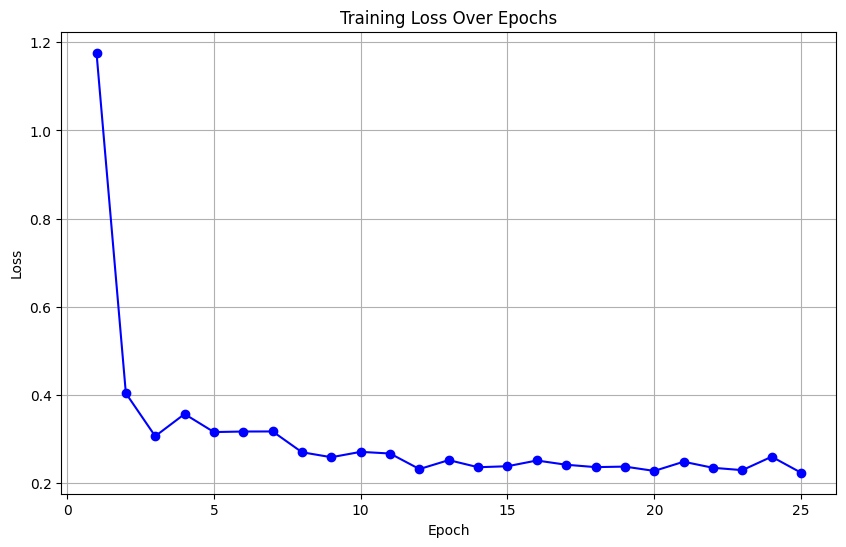

In [ ]:
import matplotlib.pyplot as plt

# Plot the epoch losses over the training period
def plot_epoch_losses(epoch_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(epoch_losses) + 1), epoch_losses, marker='o', color='b')
    plt.title('Training Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Assuming 'epoch_losses' contains the losses over epochs
plot_epoch_losses(epoch_losses)

In [ ]:
from sklearn.metrics import roc_auc_score
import numpy as np

def evaluate_model(model, data, loader, device, top_n=10):
    model.eval()
    all_scores = []
    all_labels = []
    precision_at_n = []
    recall_at_n = []

    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            out = model(batch.x_dict, batch.edge_index_dict)

            # Positive edges (user-item interactions)
            pos_edge_index = batch['user', 'interacts', 'item'].edge_index
            pos_user_indices = pos_edge_index[0]
            pos_item_indices = pos_edge_index[1]

            # Get positive scores
            pos_user_emb = out[0]['user'][pos_user_indices]
            pos_item_emb = out[0]['item'][pos_item_indices]
            pos_scores = (pos_user_emb * pos_item_emb).sum(dim=1)
            labels = torch.ones(pos_scores.size(0), device=device)  # Label positive samples as 1

            # Generate negative samples
            num_neg_samples = pos_scores.size(0)
            neg_edge_index = negative_sampling_custom(
                edge_index=pos_edge_index,
                batch=batch,
                num_neg_samples=num_neg_samples
            )
            neg_user_indices = neg_edge_index[0]
            neg_item_indices = neg_edge_index[1]

            neg_user_emb = out[0]['user'][neg_user_indices]
            neg_item_emb = out[0]['item'][neg_item_indices]
            neg_scores = (neg_user_emb * neg_item_emb).sum(dim=1)
            neg_labels = torch.zeros(neg_scores.size(0), device=device)  # Label negative samples as 0

            # Concatenate scores and labels
            combined_scores = torch.cat([pos_scores, neg_scores], dim=0)
            combined_labels = torch.cat([labels, neg_labels], dim=0)

            all_scores.append(combined_scores.cpu().numpy())
            all_labels.append(combined_labels.cpu().numpy())

            # Precision@N and Recall@N
            for i in range(pos_scores.size(0)):
                user_idx = pos_user_indices[i].item()
                actual_item = pos_item_indices[i].item()

                user_embedding = out[0]['user'][user_idx]
                item_embeddings = out[0]['item']

                scores = torch.matmul(item_embeddings, user_embedding)
                interacted_items = pos_edge_index[1][pos_edge_index[0] == user_idx]
                scores[interacted_items] = -float('inf')

                top_n_scores, top_n_indices = torch.topk(scores, top_n)
                top_n_items = top_n_indices.tolist()

                precision = 1.0 if actual_item in top_n_items else 0.0
                recall = 1.0 if actual_item in top_n_items else 0.0
                precision_at_n.append(precision)
                recall_at_n.append(recall)

    # ROC AUC
    all_scores = np.concatenate(all_scores)
    all_labels = np.concatenate(all_labels)
    roc_auc = roc_auc_score(all_labels, all_scores)


    return {
        'ROC_AUC': roc_auc,
    }

# Evaluate the model on the dataset
evaluation_metrics = evaluate_model(model, data, loader, device, top_n=10)

# Print metrics
print("Evaluation Metrics:")
for metric, value in evaluation_metrics.items():
    print(f"{metric}: {value:.4f}")


Evaluation Metrics:
ROC_AUC: 0.6481


# Recommendation

In [ ]:
import random

# Generate user-to-index and index-to-item mappings
user_id_to_index = {idx: idx for idx in range(data['user'].num_nodes)}
item_index_to_id = {idx: idx for idx in range(data['item'].num_nodes)}

def generate_recommendations(user_id, final_user_embeddings, final_item_embeddings, top_n=10):
    """
    Generate top-N item recommendations for a given user using embeddings.

    Args:
        user_id (int): The index of the user in the graph.
        final_user_embeddings (np.array): Final user embeddings.
        final_item_embeddings (np.array): Final item embeddings.
        top_n (int): Number of top recommendations to return.

    Returns:
        List[int]: List of recommended item indices.
    """
    if user_id not in user_id_to_index:
        raise ValueError(f"User ID '{user_id}' not found in the dataset.")

    user_idx = user_id_to_index[user_id]
    user_embedding = final_user_embeddings[user_idx]

    # Compute scores for all items
    scores = final_item_embeddings @ user_embedding

    # Get top-N item indices
    top_n_indices = np.argsort(-scores)[:top_n]

    return top_n_indices  # Returns item indices directly for now

# Example: Generate recommendations for 5 random users
random_users = random.sample(range(data['user'].num_nodes), 5)

for user_id in random_users:
    recommended_items = generate_recommendations(user_id, final_user_embeddings, final_item_embeddings, top_n=10)
    print(f"\nRecommendations for User {user_id}: {recommended_items}")



Recommendations for User 610: [31442  8179 32599 32600 32601 32608 30860 31439 31441  8178]

Recommendations for User 3488: [23768 15085 15087 15079 15220 15224  2238  2240  2241  2244]

Recommendations for User 2717: [31271 31267 31270 31269 31265 11938 11940 11937 11935  1730]

Recommendations for User 1524: [31271 31267 31270 31269 31265 11938 11940 11937 11935  1730]

Recommendations for User 2090: [31271 31267 31270 31269 31265 11938 11940 11937 11935  1730]


# Plots and Visualization

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


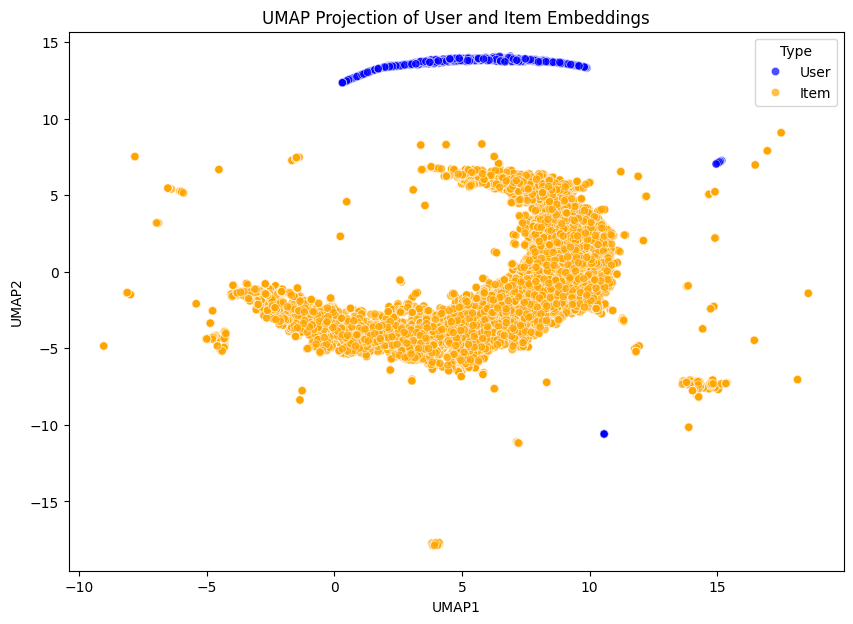

In [ ]:
import umap
import seaborn as sns
import pandas as pd

def visualize_embeddings_with_umap(user_embeddings, item_embeddings, num_users=1000, num_items=10000):
    # Sample embeddings
    sampled_user_embeddings = user_embeddings[:num_users]
    sampled_item_embeddings = item_embeddings[:num_items]

    # Combine user and item embeddings
    embeddings = np.vstack([sampled_user_embeddings, sampled_item_embeddings])
    labels = ['User'] * num_users + ['Item'] * num_items

    # Apply UMAP
    umap_model = umap.UMAP(n_components=2, random_state=42)
    embeddings_2d = umap_model.fit_transform(embeddings)

    # Create a DataFrame for visualization
    df = pd.DataFrame(embeddings_2d, columns=['UMAP1', 'UMAP2'])
    df['Type'] = labels

    # Plot
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='UMAP1', y='UMAP2', hue='Type', data=df, palette=['blue', 'orange'], alpha=0.7)
    plt.title('UMAP Projection of User and Item Embeddings')
    plt.show()

# Visualize the embeddings
visualize_embeddings_with_umap(final_user_embeddings, final_item_embeddings)

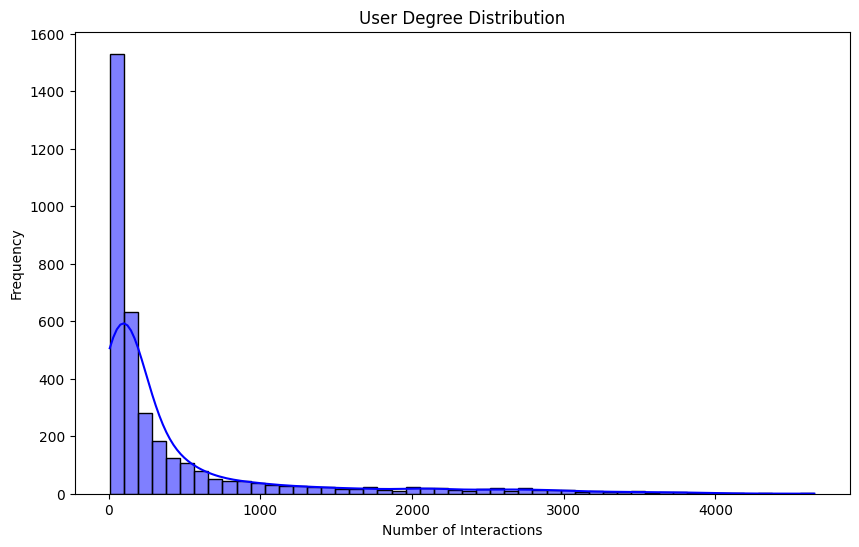

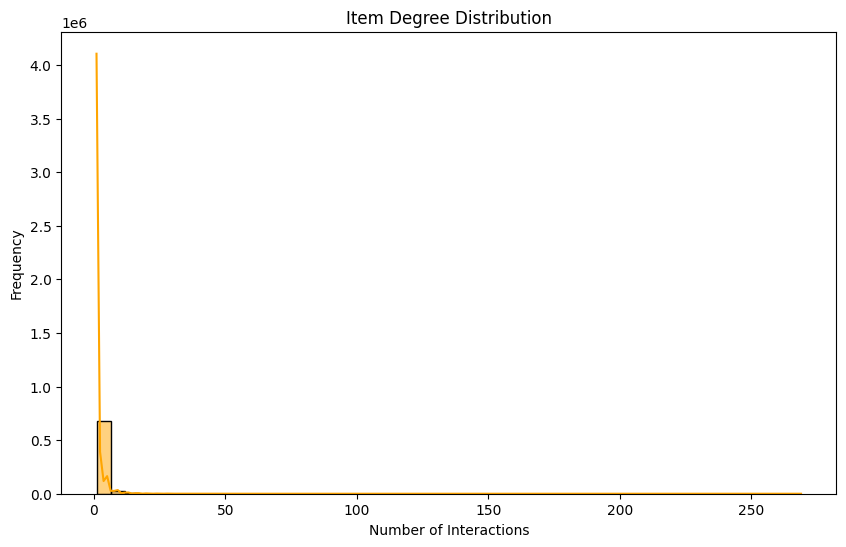

In [ ]:
def compute_degrees(edge_index, num_nodes):
    degrees = torch.bincount(edge_index[0], minlength=num_nodes).cpu().numpy()
    return degrees

user_degrees = compute_degrees(data['user', 'interacts', 'item'].edge_index, num_users)
item_degrees = compute_degrees(data['item', 'interacted_by', 'user'].edge_index, num_items)

# Plot user degree distribution
plt.figure(figsize=(10, 6))
sns.histplot(user_degrees, bins=50, kde=True, color='blue')
plt.title('User Degree Distribution')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.show()

# Plot item degree distribution
plt.figure(figsize=(10, 6))
sns.histplot(item_degrees, bins=50, kde=True, color='orange')
plt.title('Item Degree Distribution')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.show()


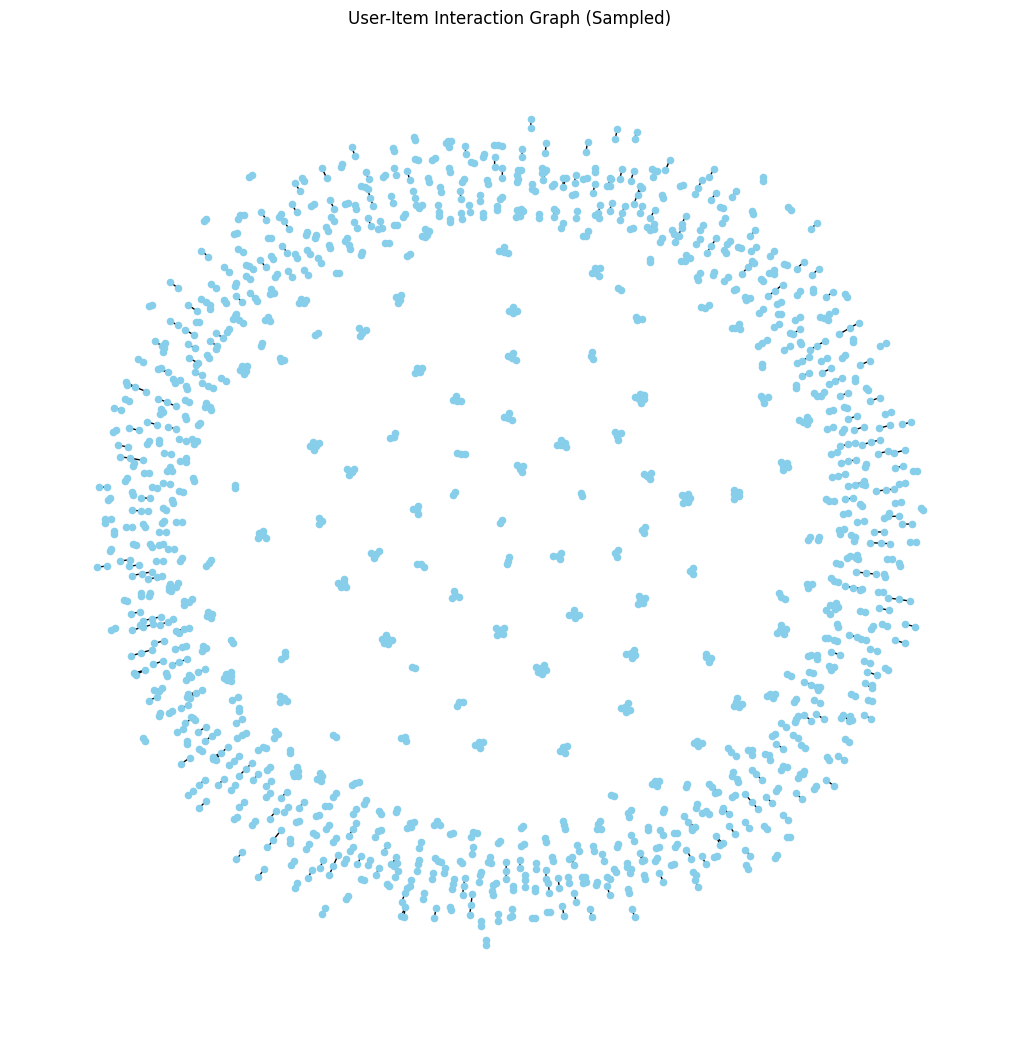

In [ ]:
import networkx as nx

# Convert edge indices to a NetworkX graph
def plot_graph(edge_index, num_edges=1000):
    G = nx.Graph()
    edges = edge_index[:, :num_edges].cpu().numpy()
    for u, v in zip(edges[0], edges[1]):
        G.add_edge(u, v)

    # Plot the graph
    plt.figure(figsize=(10, 10))
    nx.draw(G, node_size=20, node_color='skyblue', with_labels=False)
    plt.title('User-Item Interaction Graph (Sampled)')
    plt.show()

# Visualize a subset of the user-item graph
plot_graph(data['user', 'interacts', 'item'].edge_index)


In [ ]:
# Save the model's state dictionary
model_save_path = "/content/drive/MyDrive/iqon_data/improved_gnn_model.pth"
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

# To load the model later
# loaded_model = ImprovedGNN(hidden_channels=hidden_channels, metadata=data.metadata(), heads=4, dropout_rate=0.3, use_edge_weights=True).to(device)

# Load the saved state dictionary
# loaded_model.load_state_dict(torch.load("improved_gnn_model.pth"))
# loaded_model.eval()  # Set the model to evaluation mode
# print("Model loaded and ready for inference.")

Model saved to /content/drive/MyDrive/iqon_data/improved_gnn_model.pth


In [ ]:
# Save the final embeddings
np.save("/content/drive/MyDrive/iqon_data/final_user_embeddings.npy", final_user_embeddings)
np.save("/content/drive/MyDrive/iqon_data/final_item_embeddings.npy", final_item_embeddings)
print("Embeddings saved.")

# To load the embeddings later:
# loaded_user_embeddings = np.load("final_user_embeddings.npy")
# loaded_item_embeddings = np.load("final_item_embeddings.npy")
# print("Embeddings loaded successfully.")

Embeddings saved.


# Recommendation system usage

In [ ]:
chosen_user_id = 1029

In [ ]:
import numpy as np
import torch

# Function to load the trained model and embeddings
def load_model_and_embeddings(model_path, user_embeddings_path, item_embeddings_path, metadata, hidden_channels=64):
    # Load the model
    loaded_model = ImprovedGNN(hidden_channels=hidden_channels, metadata=metadata, heads=4, dropout_rate=0.3, use_edge_weights=True).to(device)
    loaded_model.load_state_dict(torch.load(model_path))
    loaded_model.eval()

    # Load embeddings
    user_embeddings = np.load(user_embeddings_path)
    item_embeddings = np.load(item_embeddings_path)

    return loaded_model, user_embeddings, item_embeddings

# Function to recommend top-N items for a user
def recommend_items_for_user(user_id, user_embeddings, item_embeddings, top_n=10):
    """
    Recommends top-N items for a given user based on precomputed embeddings.

    Args:
        user_id (int): The user index.
        user_embeddings (np.array): The embeddings for all users.
        item_embeddings (np.array): The embeddings for all items.
        top_n (int): The number of top recommendations to return.

    Returns:
        List[int]: List of item indices recommended for the user.
    """
    # Get the user's embedding
    user_embedding = user_embeddings[user_id]

    # Compute relevance scores (dot product with all item embeddings)
    scores = np.dot(item_embeddings, user_embedding)

    # Get the indices of the top-N items
    top_n_indices = np.argsort(-scores)[:top_n]

    return top_n_indices  # List of item indices in descending order of relevance

# Paths to saved files
model_path = "/content/drive/MyDrive/iqon_data/improved_gnn_model.pth"
user_embeddings_path = "/content/drive/MyDrive/iqon_data/final_user_embeddings.npy"
item_embeddings_path = "/content/drive/MyDrive/iqon_data/final_item_embeddings.npy"

# Load model and embeddings
loaded_model, loaded_user_embeddings, loaded_item_embeddings = load_model_and_embeddings(
    model_path,
    user_embeddings_path,
    item_embeddings_path,
    metadata=data.metadata(),  # Use your existing metadata
    hidden_channels=64
)

# Choose a user and recommend 10 items
recommended_items = recommend_items_for_user(
    chosen_user_id,
    loaded_user_embeddings,
    loaded_item_embeddings,
    top_n=10
)

# Display the recommended items
print(f"Recommended items for User {chosen_user_id}: {recommended_items}")

Recommended items for User 610: [31442  8179 32599 32600 32601 32608 30860 31439 31441  8178]


# Metrics

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score
import torch

def load_model_and_embeddings(model_path, user_embeddings_path, item_embeddings_path, hidden_channels):
    """
    Load the model and user/item embeddings from files, with `weights_only=True` to avoid security risks.
    """
    model = torch.load(model_path, weights_only=True)  # Added weights_only=True for safety
    user_embeddings = np.load(user_embeddings_path)
    item_embeddings = np.load(item_embeddings_path)

    return model, user_embeddings, item_embeddings

def recommend_items_for_user(user_id, user_embeddings, item_embeddings, top_n=10):
    """
    Recommend top-N items for a user based on user and item embeddings.
    """
    user_embedding = user_embeddings[user_id]
    scores = np.dot(item_embeddings, user_embedding)
    top_n_indices = np.argsort(-scores)[:top_n]
    return top_n_indices

def calculate_auc(y_true, y_score):
    """
    Calculate AUC score, but ensure both classes (0 and 1) are present in y_true.
    """
    if len(np.unique(y_true)) == 2:
        return roc_auc_score(y_true.reshape(-1, 1), y_score.reshape(-1, 1))
    else:
        print("AUC cannot be calculated because only one class is present in y_true.")
        return None

def calculate_mrr(recommended_items, relevant_items):
    """
    Calculate Mean Reciprocal Rank (MRR).
    """
    for rank, item in enumerate(recommended_items, start=1):
        if item in relevant_items:
            return 1.0 / rank
    return 0.0

def calculate_ndcg(recommended_items, relevant_items, k=10):
    """
    Calculate NDCG@K (Normalized Discounted Cumulative Gain).
    """
    dcg = 0.0
    for i, item in enumerate(recommended_items[:k]):
        if item in relevant_items:
            dcg += 1.0 / np.log2(i + 2)
    idcg = sum(1.0 / np.log2(i + 2) for i in range(min(len(relevant_items), k)))
    return dcg / idcg if idcg > 0 else 0.0

def calculate_hit_rate(recommended_items, relevant_items, k=10):
    """
    Calculate Hit Rate (HR@K).
    """
    return int(any(item in relevant_items for item in recommended_items[:k]))

# Example Usage:
# Paths to saved files
model_path = "/content/drive/MyDrive/iqon_data/improved_gnn_model.pth"
user_embeddings_path = "/content/drive/MyDrive/iqon_data/final_user_embeddings.npy"
item_embeddings_path = "/content/drive/MyDrive/iqon_data/final_item_embeddings.npy"

# Load model and embeddings
loaded_model, loaded_user_embeddings, loaded_item_embeddings = load_model_and_embeddings(
    model_path, user_embeddings_path, item_embeddings_path, hidden_channels=64
)

# Assume we have a ground truth of relevant items for a user (you should replace this with actual data)
ground_truth_relevant_items = [31442, 8179, 32599]  # Example relevant items for the user
chosen_user_id = 610  # Example user ID
top_n = 10  # Number of top recommendations

# Get recommendations for the user
recommended_items = recommend_items_for_user(
    chosen_user_id, loaded_user_embeddings, loaded_item_embeddings, top_n=top_n
)

# Calculate metrics
y_true = np.isin(loaded_item_embeddings, ground_truth_relevant_items).astype(int)  # Binary ground truth for AUC
y_score = np.dot(loaded_item_embeddings, loaded_user_embeddings[chosen_user_id])  # Scores for AUC

# Reshaping y_true and y_score to 2D as required by sklearn
y_true = y_true.reshape(-1, 1)
y_score = y_score.reshape(-1, 1)

# Ensure AUC calculation only if both classes are present
auc_score = calculate_auc(y_true, y_score)

# Calculate other metrics
mrr_score = calculate_mrr(recommended_items, ground_truth_relevant_items)
ndcg_score = calculate_ndcg(recommended_items, ground_truth_relevant_items, k=top_n)
hit_rate_score = calculate_hit_rate(recommended_items, ground_truth_relevant_items, k=top_n)

# Display the metrics
print(f"MRR: {mrr_score:.4f}")
print(f"NDCG@{top_n}: {ndcg_score:.4f}")
print(f"HR@{top_n}: {hit_rate_score}")

AUC cannot be calculated because only one class is present in y_true.
MRR: 1.0000
NDCG@10: 1.0000
HR@10: 1
